# Breast Cancer Predictions using Logistic Regression

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
%matplotlib inline

# Setting Display Limit

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importing Dataset

Using in-built breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df["cancer"] = pd.DataFrame(cancer.target)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
df["cancer"].value_counts()

## means 1 is Benign
## and 0 is Malignant

1    357
0    212
Name: cancer, dtype: int64

In [12]:
## Changing the values of target

df['cancer'] = df.cancer.apply(lambda x: 0 if x == 1 else 1)
df.cancer.value_counts()

0    357
1    212
Name: cancer, dtype: int64

0- Non-cancerous

1- Cancerous

# Checking data info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Checking for null values

In [14]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
cancer                     0
dtype: int64

# Checking for duplicates

In [15]:
df.duplicated().sum()

0

# Univariate Analysis

### Boxplots

Feature:  mean radius


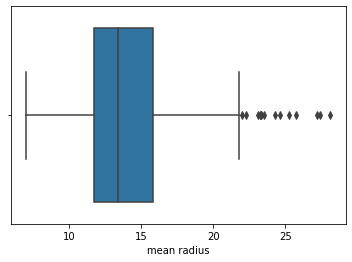

*****************************************************************************************************************************
Feature:  mean texture


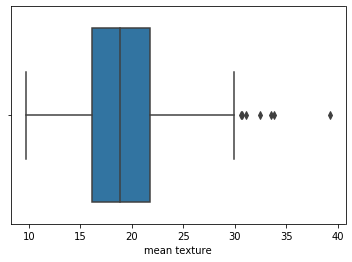

*****************************************************************************************************************************
Feature:  mean perimeter


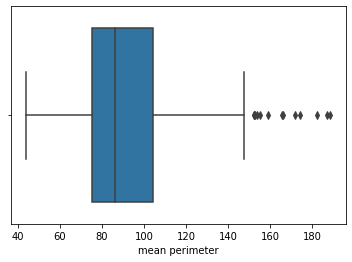

*****************************************************************************************************************************
Feature:  mean area


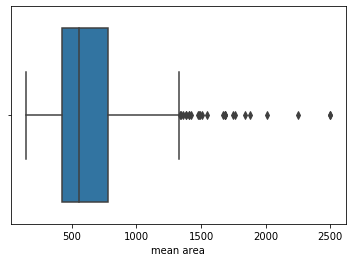

*****************************************************************************************************************************
Feature:  mean smoothness


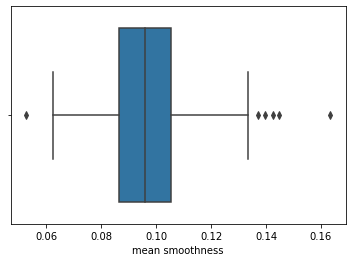

*****************************************************************************************************************************
Feature:  mean compactness


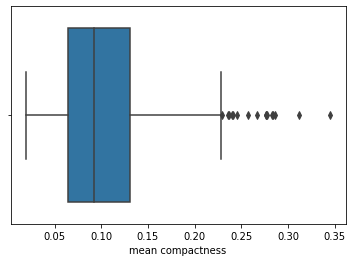

*****************************************************************************************************************************
Feature:  mean concavity


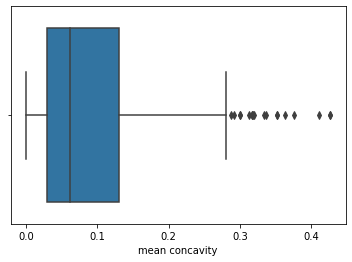

*****************************************************************************************************************************
Feature:  mean concave points


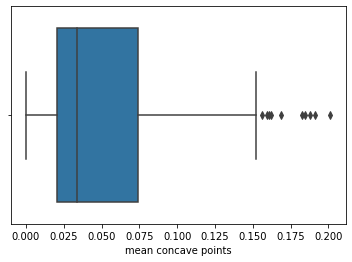

*****************************************************************************************************************************
Feature:  mean symmetry


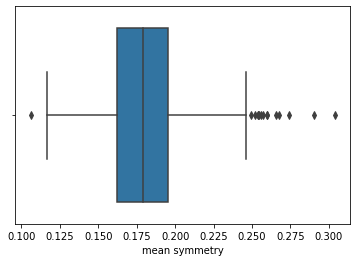

*****************************************************************************************************************************
Feature:  mean fractal dimension


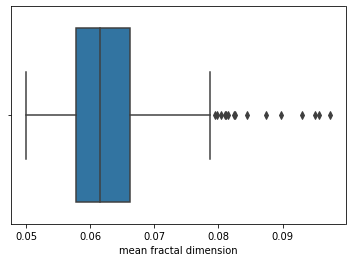

*****************************************************************************************************************************
Feature:  radius error


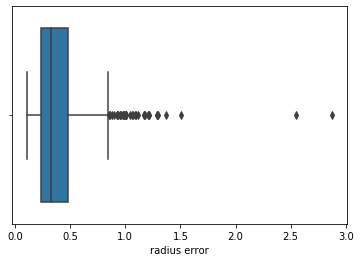

*****************************************************************************************************************************
Feature:  texture error


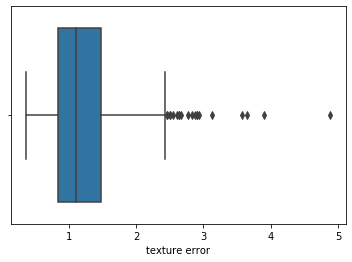

*****************************************************************************************************************************
Feature:  perimeter error


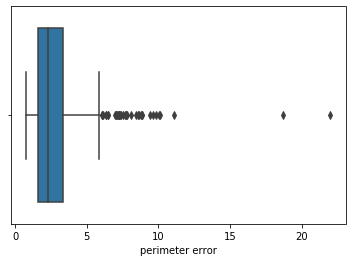

*****************************************************************************************************************************
Feature:  area error


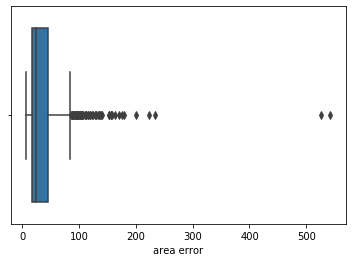

*****************************************************************************************************************************
Feature:  smoothness error


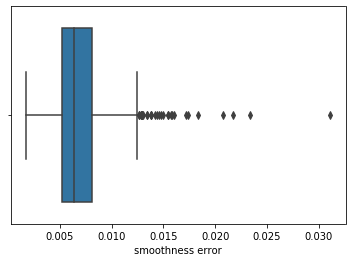

*****************************************************************************************************************************
Feature:  compactness error


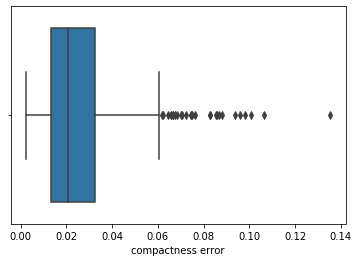

*****************************************************************************************************************************
Feature:  concavity error


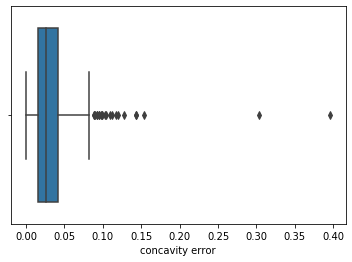

*****************************************************************************************************************************
Feature:  concave points error


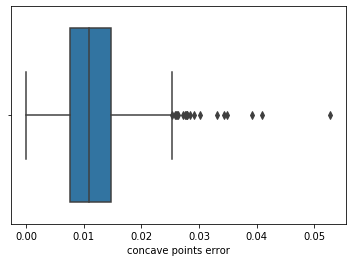

*****************************************************************************************************************************
Feature:  symmetry error


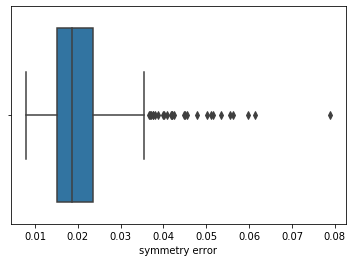

*****************************************************************************************************************************
Feature:  fractal dimension error


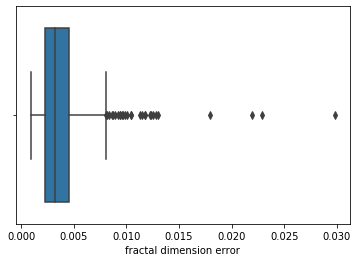

*****************************************************************************************************************************
Feature:  worst radius


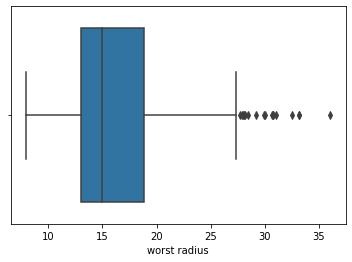

*****************************************************************************************************************************
Feature:  worst texture


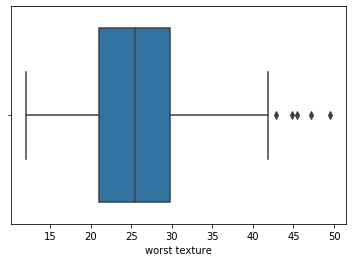

*****************************************************************************************************************************
Feature:  worst perimeter


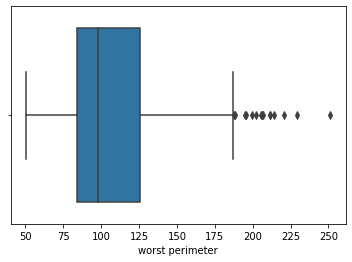

*****************************************************************************************************************************
Feature:  worst area


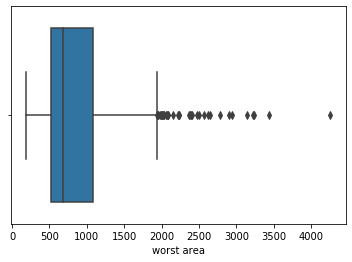

*****************************************************************************************************************************
Feature:  worst smoothness


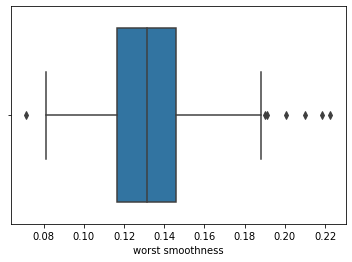

*****************************************************************************************************************************
Feature:  worst compactness


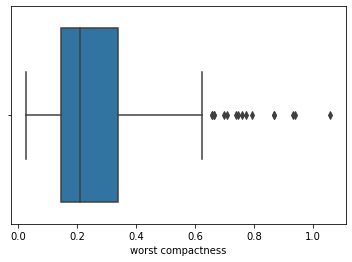

*****************************************************************************************************************************
Feature:  worst concavity


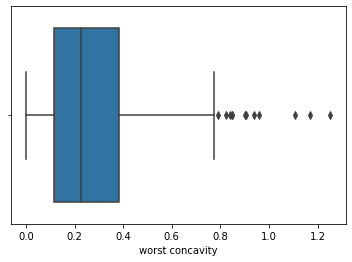

*****************************************************************************************************************************
Feature:  worst concave points


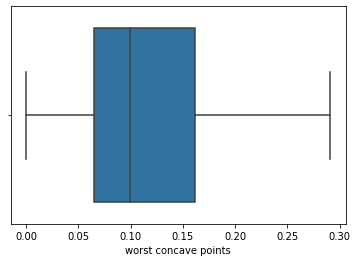

*****************************************************************************************************************************
Feature:  worst symmetry


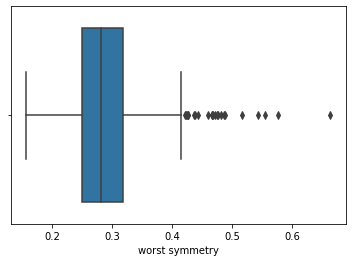

*****************************************************************************************************************************
Feature:  worst fractal dimension


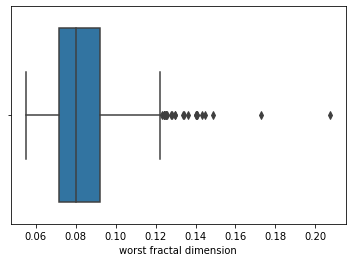

*****************************************************************************************************************************


In [16]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.boxplot(df[col])
        plt.show()
        print("*"*125)

### Outlier treatment

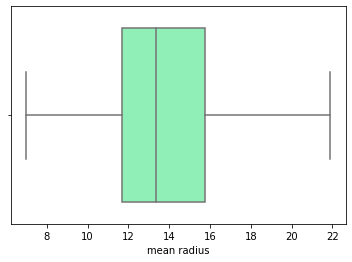

**************************************************************************************************** 




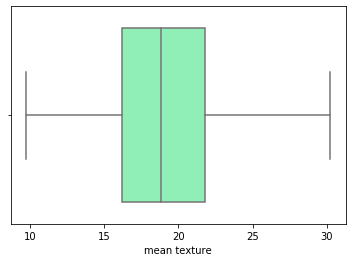

**************************************************************************************************** 




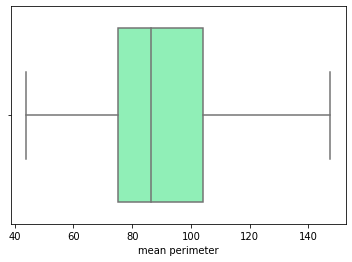

**************************************************************************************************** 




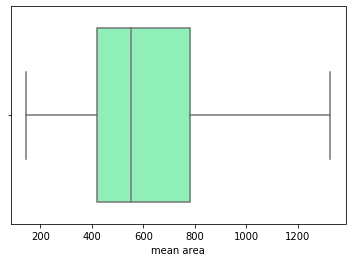

**************************************************************************************************** 




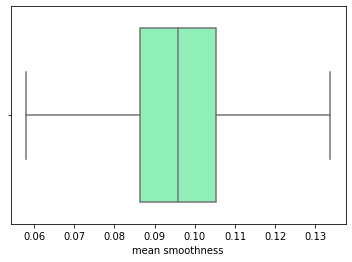

**************************************************************************************************** 




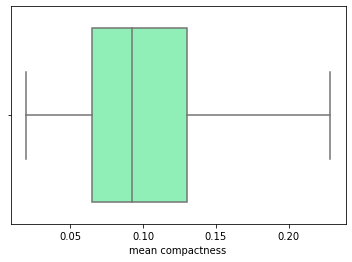

**************************************************************************************************** 




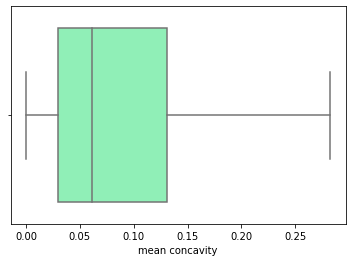

**************************************************************************************************** 




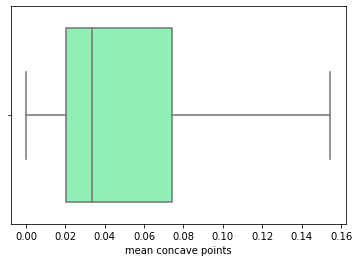

**************************************************************************************************** 




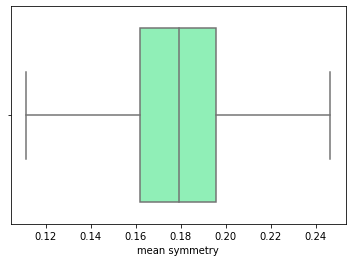

**************************************************************************************************** 




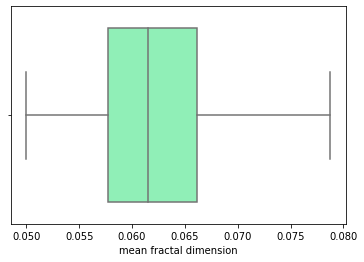

**************************************************************************************************** 




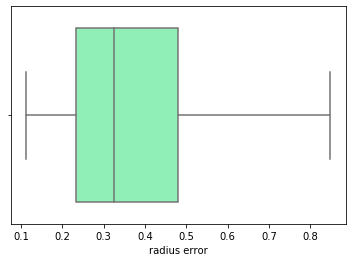

**************************************************************************************************** 




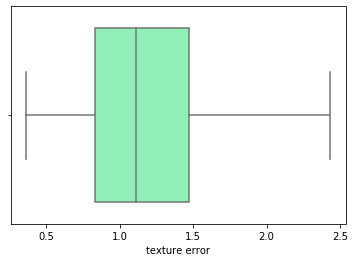

**************************************************************************************************** 




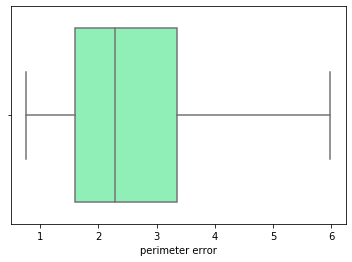

**************************************************************************************************** 




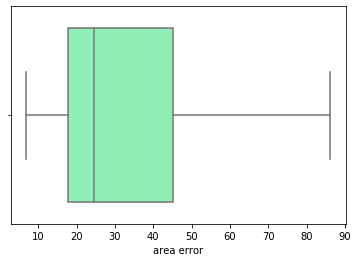

**************************************************************************************************** 




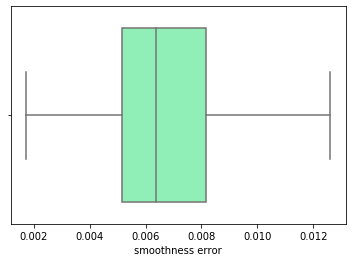

**************************************************************************************************** 




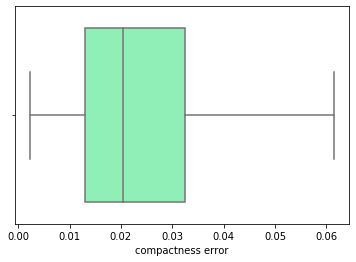

**************************************************************************************************** 




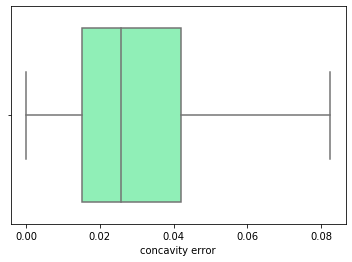

**************************************************************************************************** 




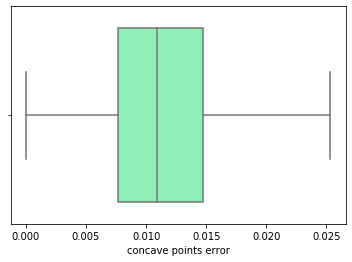

**************************************************************************************************** 




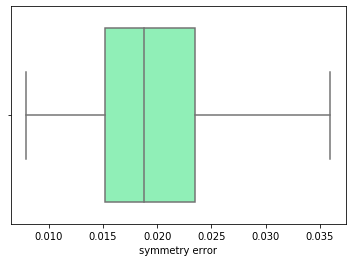

**************************************************************************************************** 




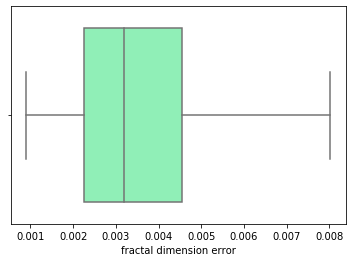

**************************************************************************************************** 




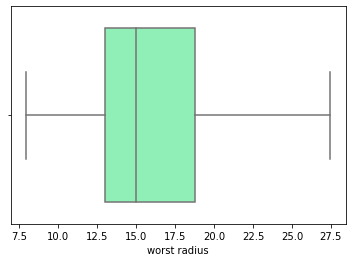

**************************************************************************************************** 




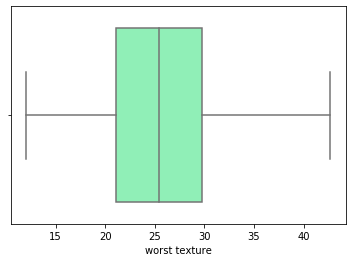

**************************************************************************************************** 




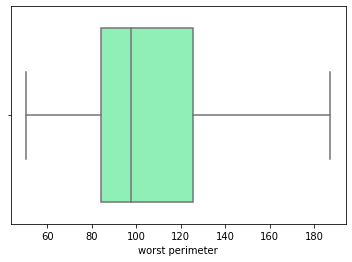

**************************************************************************************************** 




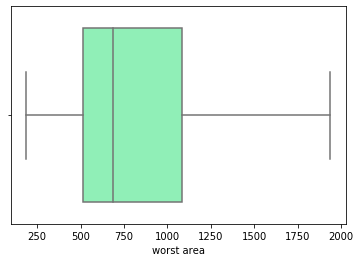

**************************************************************************************************** 




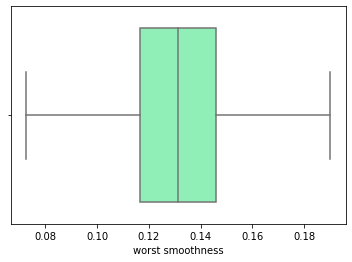

**************************************************************************************************** 




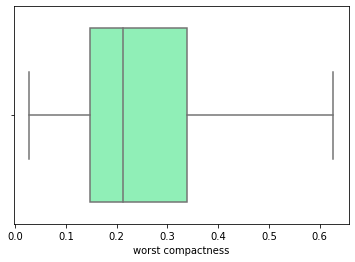

**************************************************************************************************** 




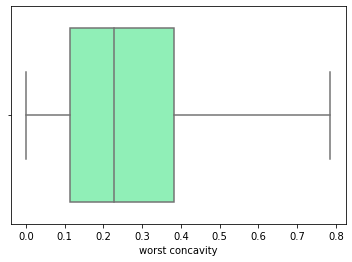

**************************************************************************************************** 




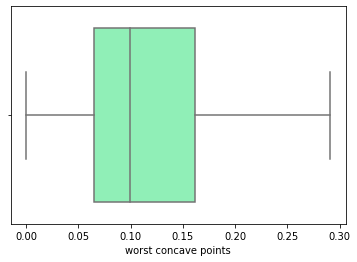

**************************************************************************************************** 




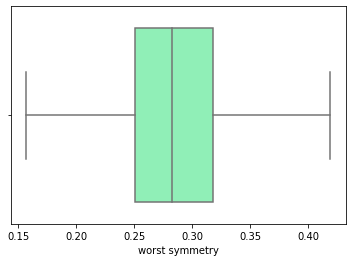

**************************************************************************************************** 




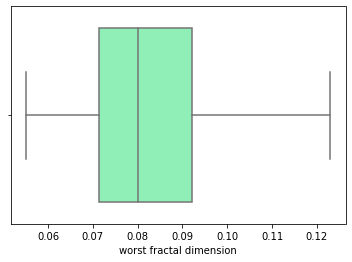

**************************************************************************************************** 




In [17]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

### Distribution plots

Feature:  mean radius


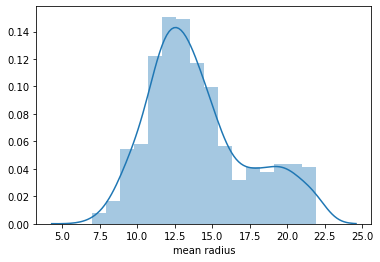

*****************************************************************************************************************************
Feature:  mean texture


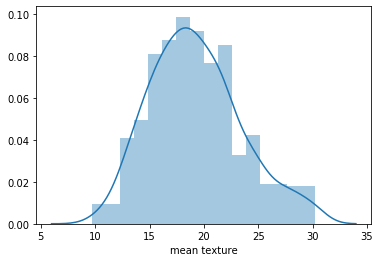

*****************************************************************************************************************************
Feature:  mean perimeter


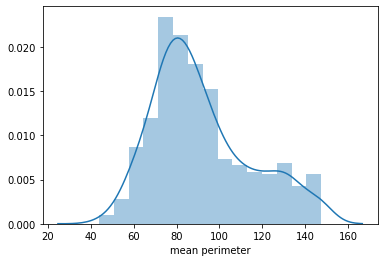

*****************************************************************************************************************************
Feature:  mean area


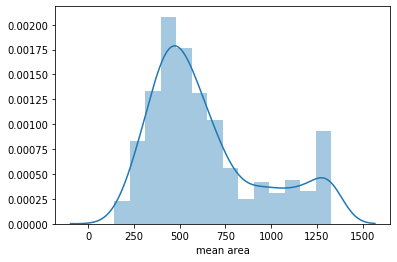

*****************************************************************************************************************************
Feature:  mean smoothness


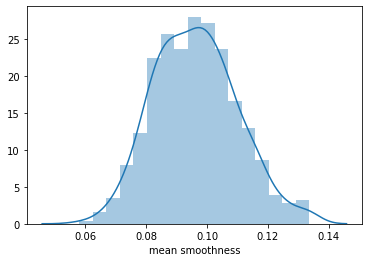

*****************************************************************************************************************************
Feature:  mean compactness


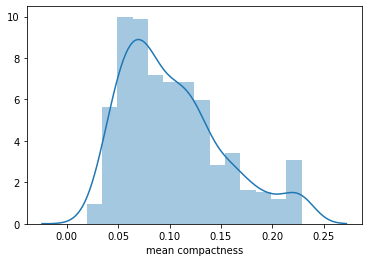

*****************************************************************************************************************************
Feature:  mean concavity


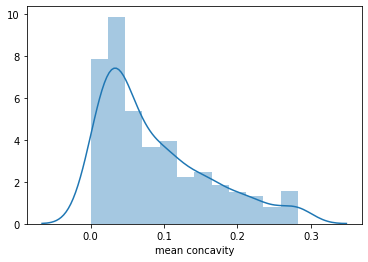

*****************************************************************************************************************************
Feature:  mean concave points


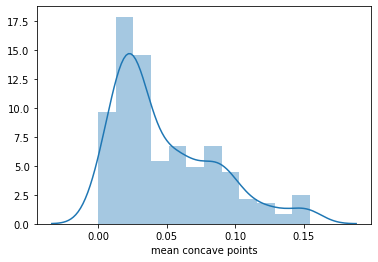

*****************************************************************************************************************************
Feature:  mean symmetry


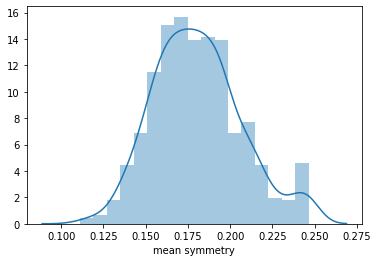

*****************************************************************************************************************************
Feature:  mean fractal dimension


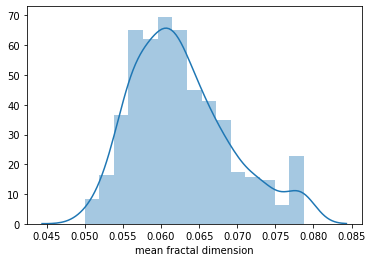

*****************************************************************************************************************************
Feature:  radius error


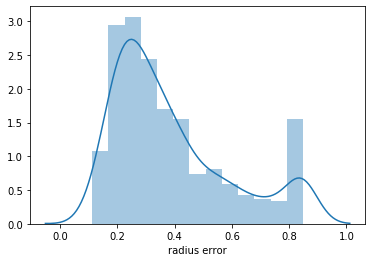

*****************************************************************************************************************************
Feature:  texture error


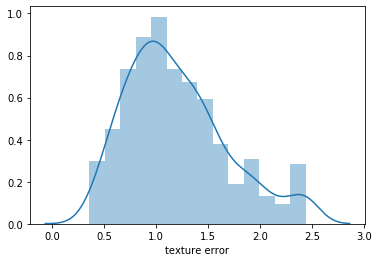

*****************************************************************************************************************************
Feature:  perimeter error


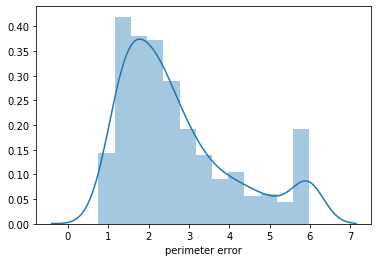

*****************************************************************************************************************************
Feature:  area error


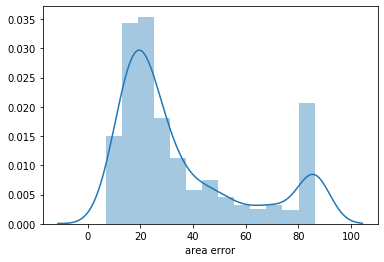

*****************************************************************************************************************************
Feature:  smoothness error


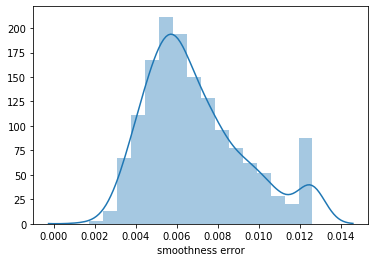

*****************************************************************************************************************************
Feature:  compactness error


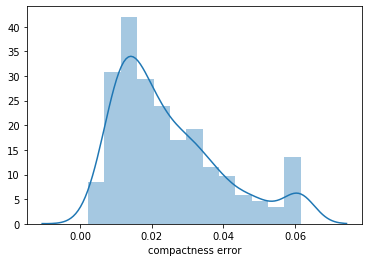

*****************************************************************************************************************************
Feature:  concavity error


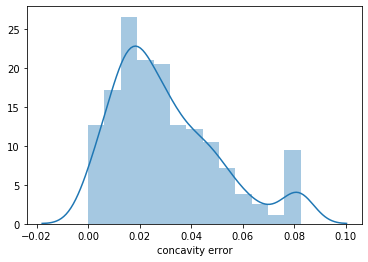

*****************************************************************************************************************************
Feature:  concave points error


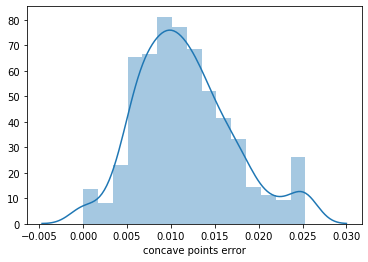

*****************************************************************************************************************************
Feature:  symmetry error


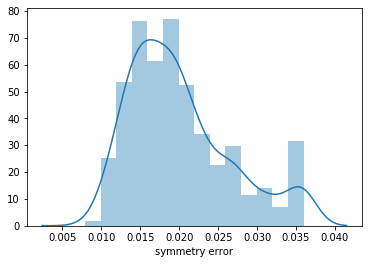

*****************************************************************************************************************************
Feature:  fractal dimension error


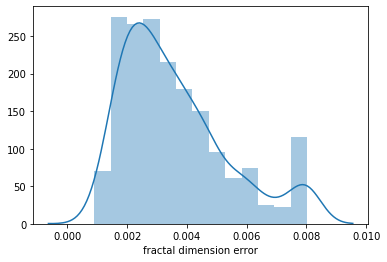

*****************************************************************************************************************************
Feature:  worst radius


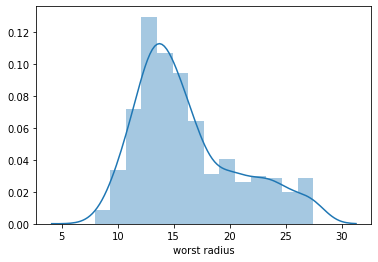

*****************************************************************************************************************************
Feature:  worst texture


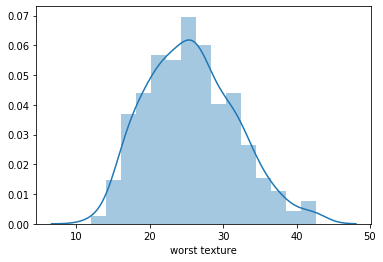

*****************************************************************************************************************************
Feature:  worst perimeter


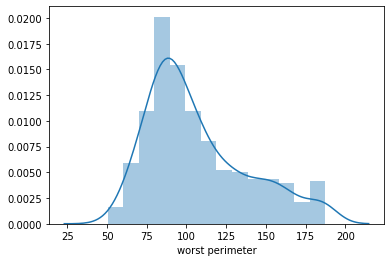

*****************************************************************************************************************************
Feature:  worst area


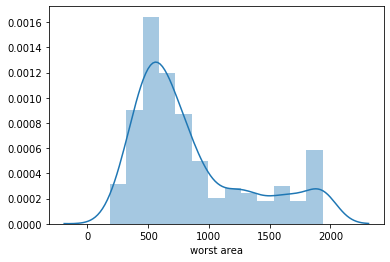

*****************************************************************************************************************************
Feature:  worst smoothness


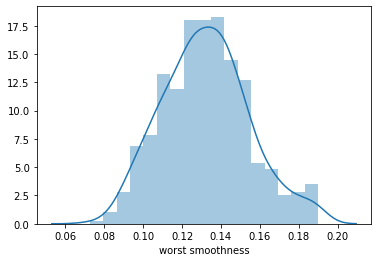

*****************************************************************************************************************************
Feature:  worst compactness


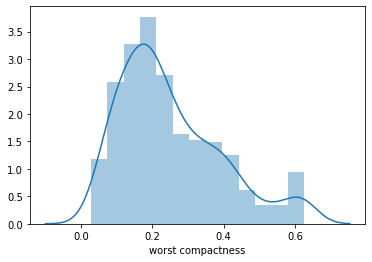

*****************************************************************************************************************************
Feature:  worst concavity


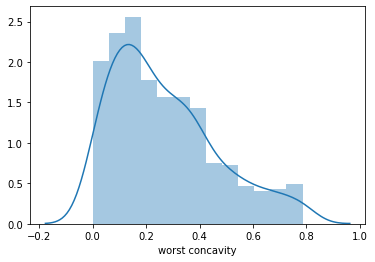

*****************************************************************************************************************************
Feature:  worst concave points


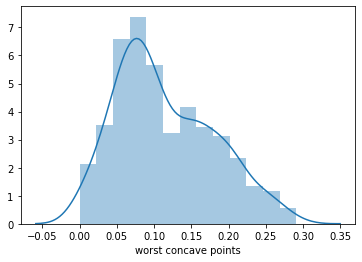

*****************************************************************************************************************************
Feature:  worst symmetry


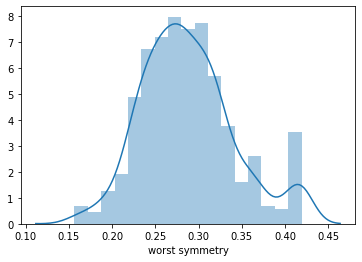

*****************************************************************************************************************************
Feature:  worst fractal dimension


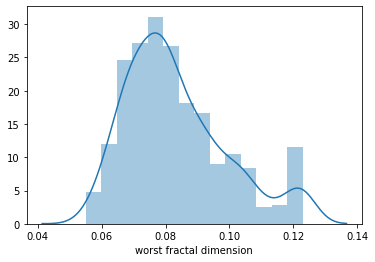

*****************************************************************************************************************************


In [18]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.distplot(df[col])
        plt.show()
        print("*"*125)

Some variables have skewed data

### Checking distribution of target

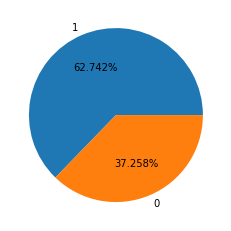

In [19]:
plt.pie(df['cancer'].value_counts(),
               labels = df['cancer'].unique(),
               autopct = '%0.3f%%');


Class Imbalance

# Bivariate Analysis

### Checking Correlation

In [20]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
mean radius,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,-0.319056,0.683660,-0.110023,0.687035,0.832692,-0.278944,0.234053,0.327152,0.422631,-0.173992,-0.008658,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799,0.745217
mean texture,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,-0.065946,0.327560,0.413346,0.341939,0.357392,0.020116,0.220249,0.235813,0.182780,0.000368,0.110895,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049,0.419123
mean perimeter,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,-0.266586,0.696934,-0.099647,0.705934,0.840760,-0.257509,0.281713,0.368255,0.455689,-0.154043,0.036179,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825,0.759006
mean area,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,-0.303524,0.712001,-0.086600,0.712171,0.857245,-0.242369,0.239557,0.333751,0.423980,-0.150152,0.008509,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012,0.752786
mean smoothness,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,0.586706,0.319067,0.095841,0.320742,0.284203,0.348727,0.344675,0.311431,0.415558,0.158139,0.375970,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675,0.366931
mean compactness,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,0.557003,0.528689,0.044654,0.583427,0.542559,0.123382,0.780394,0.723896,0.693073,0.144096,0.619414,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169,0.608494
mean concavity,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,0.325513,0.641539,0.069178,0.682717,0.689730,0.076033,0.697114,0.771742,0.706172,0.095482,0.501686,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332,0.727168
mean concave points,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,0.170028,0.729187,0.024127,0.753484,0.799938,0.013705,0.533459,0.584701,0.669339,0.034775,0.338782,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626,0.788099
mean symmetry,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,0.471760,0.344226,0.145508,0.347979,0.293160,0.211799,0.425863,0.369554,0.387573,0.404763,0.397882,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494,0.334536
mean fractal dimension,-0.319056,-0.065946,-0.266586,-0.303524,0.586706,0.557003,0.325513,0.170028,0.471760,1.000000,0.006154,0.173025,0.044862,-0.104908,0.418539,0.549193,0.416011,0.311171,0.316950,0.717762,-0.252727,-0.037384,-0.202961,-0.235192,0.505984,0.456164,0.335359,0.178397,0.323400,0.776915,-0.006801


# Splitting target

In [21]:
X = df.drop('cancer', 1)
y = df['cancer']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


# Scaling

In [22]:
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X[0]

array([0.73791809, 0.03262722, 0.76187262, 0.72497464, 0.79800581,
       1.        , 1.        , 0.95188792, 0.96671598, 0.99861063,
       1.        , 0.26283179, 1.        , 1.        , 0.42996743,
       0.7896309 , 0.65135168, 0.62682676, 0.78880262, 0.7432732 ,
       0.89349718, 0.17318982, 0.98002556, 1.        , 0.7627551 ,
       1.        , 0.90630172, 0.91202749, 1.        , 0.93953215])

# Multicollinearity

In [23]:
h = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(h)

[9960.016544866994, 90.98835476663855, 9863.039263239674, 975.3189693424268, 84.72135661074651, 106.87149987468509, 117.32123111083452, 130.9982314308679, 37.72228497429252, 47.93210409274919, 164.9055647083998, 24.35188896116841, 107.26108524666547, 149.0198692915421, 31.60930269052665, 70.6736938661824, 54.94629312951777, 64.72772052897166, 22.77705970786534, 38.07892348438051, 2493.3153463891044, 152.39346371234362, 1329.8571772443383, 847.3984534534767, 116.28016967894521, 137.56762621182148, 121.34309082562416, 172.16070355061615, 69.10808730603993, 87.56389785574986]


Extremely High correlations

However, making the first model with all the values

# Model Making

### Splitting dataset into training set and test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=100)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
??LogisticRegression

In [27]:
## Using default parameters first

model = LogisticRegression() 
model

LogisticRegression()

In [28]:
## Training the algorithm

model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope:
print(model.coef_)

[-10.68405534]
[[ 0.99244226  1.55781707  0.96547793  1.19495725  0.72729525  0.1998639
   1.31245533  1.47398183  0.50106307 -0.67626439  1.23889327  0.28762622
   0.97457941  1.74238916  0.1012754  -0.9293248   0.09845633  0.40721918
  -0.66990678 -1.07568205  1.39078095  1.94261025  1.34379509  1.60271957
   1.54494118  0.74206829  1.54764482  1.73710109  1.3486024   0.62930958]]


In [30]:
## Predicting on test

y_test_pred = model.predict(X_test)

y_test_pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [31]:
## Checking reports

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_test_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy_score Testing Data:  96.49

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.92      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



array([[65,  0],
       [ 4, 45]], dtype=int64)

In [32]:
## Checking on train data

y_train_pred = model.predict(X_train)

y_train_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [33]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))
print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy_score Training Data:  97.58

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       292
           1       1.00      0.93      0.97       163

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



array([[292,   0],
       [ 11, 152]], dtype=int64)

Neither underfitting nor overfitting

Accuracy seems good for both

In [34]:
y_probs = model.predict_proba(X_test)


display(y_probs,)
np.argmax(y_probs)

array([[1.31305942e-03, 9.98686941e-01],
       [6.92465400e-01, 3.07534600e-01],
       [1.54404738e-02, 9.84559526e-01],
       [9.99040332e-01, 9.59667770e-04],
       [9.56153380e-01, 4.38466198e-02],
       [9.38281227e-01, 6.17187731e-02],
       [2.42851080e-01, 7.57148920e-01],
       [8.90732293e-04, 9.99109268e-01],
       [8.62215575e-01, 1.37784425e-01],
       [8.79240053e-01, 1.20759947e-01],
       [9.97547624e-01, 2.45237563e-03],
       [1.78077188e-03, 9.98219228e-01],
       [6.36778739e-05, 9.99936322e-01],
       [1.28022775e-03, 9.98719772e-01],
       [9.97364068e-01, 2.63593157e-03],
       [5.44666652e-01, 4.55333348e-01],
       [3.57102755e-01, 6.42897245e-01],
       [9.46277814e-01, 5.37221862e-02],
       [9.76135856e-01, 2.38641441e-02],
       [9.83165182e-01, 1.68348176e-02],
       [5.51902897e-01, 4.48097103e-01],
       [9.98174781e-01, 1.82521943e-03],
       [1.26910110e-01, 8.73089890e-01],
       [2.14605269e-04, 9.99785395e-01],
       [1.003391

79

In [35]:
## Changing the parameters

classifier = LogisticRegression(C=.1,random_state=100, max_iter=10000, 
                                 penalty='l1', solver='saga', verbose=True, n_jobs=-1) 


In [36]:
#training the algorithm

classifier.fit(X_train, y_train)

classifier

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 240 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=0.1, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=100, solver='saga', verbose=True)

In [37]:
#To retrieve the intercept:
print(classifier.intercept_)

#For retrieving the slope:
print(classifier.coef_)

[-3.66572539]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.90919009 0.         0.         0.         0.
  0.         0.         0.         0.         0.         2.29855013
  0.         0.         0.49229289 3.31674011 0.         0.        ]]


In [38]:
## L2 penalty is imposed by default in Logistic
## Most weights have been reduced to zero

In [39]:
y_pred= classifier.predict(X_test)

y_pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [40]:
## Checking reports

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy_score Testing Data:  94.74

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.88      0.93        49

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



array([[65,  0],
       [ 4, 45]], dtype=int64)

In [41]:
y_train_pred = classifier.predict(X_train)

y_train_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [42]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))

print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy_score Training Data:  92.97

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       292
           1       0.99      0.81      0.89       163

    accuracy                           0.93       455
   macro avg       0.95      0.90      0.92       455
weighted avg       0.94      0.93      0.93       455



array([[291,   1],
       [ 31, 132]], dtype=int64)

Accuracy has been reduced compared to when we used default parameters

# Feature Selection

In [43]:
### Using correlation matrix, applying threshold for removal of features.removing
## Values having correlaation with target < 0.60 and
## Values having correlation wiht target > -0.60

correlation = df.corr()
x = correlation.cancer[(correlation.cancer > 0.60) | (correlation.cancer < -0.60)]
x

mean radius             0.745217
mean perimeter          0.759006
mean area               0.752786
mean compactness        0.608494
mean concavity          0.727168
mean concave points     0.788099
radius error            0.642399
perimeter error         0.646875
area error              0.739068
worst radius            0.793938
worst perimeter         0.800618
worst area              0.794640
worst compactness       0.611083
worst concavity         0.683565
worst concave points    0.793566
cancer                  1.000000
Name: cancer, dtype: float64

In [44]:
X = df[x.index]

X = X.drop('cancer', 1)

y = df['cancer']

X.head()

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.22862,0.28241,0.14710,0.84865,5.9835,86.20,25.38,184.60,1937.05,0.62695,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.54350,3.3980,74.08,24.99,158.80,1937.05,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.74560,4.5850,86.20,23.57,152.50,1709.00,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.22862,0.24140,0.10520,0.49560,3.4450,27.23,14.91,98.87,567.70,0.62695,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.75720,5.4380,86.20,22.54,152.20,1575.00,0.20500,0.4000,0.1625


### Scaling

In [45]:
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X[0]

array([0.73791809, 0.76187262, 0.72497464, 1.        , 1.        ,
       0.95188792, 1.        , 1.        , 1.        , 0.89349718,
       0.98002556, 1.        , 1.        , 0.90630172, 0.91202749])

# Model Making

In [46]:
## Splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=100)

In [47]:
## Using Logistic Regression with default parameters

classify = LogisticRegression() 
classify

LogisticRegression()

In [48]:
classify.fit(X_train, y_train)

LogisticRegression()

In [49]:
#To retrieve the intercept:
print(classify.intercept_)

#For retrieving the slope:
print(classify.coef_)

[-7.94590108]
[[ 0.8082053   0.75865803  1.00016203 -0.17906004  0.9776556   1.70672961
   1.1537152   0.54655525  1.75612685  1.75282573  1.60769216  2.00163628
   1.15854624  1.79090502  2.51073101]]


In [50]:
## Predicting on test

y__pred = classify.predict(X_test)

y__pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [51]:
## Checking reports

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y__pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y__pred))

cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy_score Testing Data:  92.98

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.94      0.90      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



array([[65,  0],
       [ 4, 45]], dtype=int64)

In [52]:
## Checking on train data

y_train_pred = classify.predict(X_train)

y_train_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [53]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))

print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy_score Training Data:  93.63

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       292
           1       0.95      0.87      0.91       163

    accuracy                           0.94       455
   macro avg       0.94      0.92      0.93       455
weighted avg       0.94      0.94      0.94       455



array([[285,   7],
       [ 22, 141]], dtype=int64)

Not a case of over or undefitting

# ROC AUC Curve

In [59]:
from sklearn import metrics

print("Accuracy:",metrics.roc_curve(y_test, y_test_pred))

print("Accuracy:",metrics.roc_curve(y_test, y_pred))

print("Accuracy:",metrics.roc_curve(y_test, y__pred))

Accuracy: (array([0., 0., 1.]), array([0.        , 0.91836735, 1.        ]), array([2, 1, 0], dtype=int64))
Accuracy: (array([0., 0., 1.]), array([0.        , 0.87755102, 1.        ]), array([2, 1, 0], dtype=int64))
Accuracy: (array([0.        , 0.04615385, 1.        ]), array([0.        , 0.89795918, 1.        ]), array([2, 1, 0], dtype=int64))


# Plot of ROC

In [60]:
fpr = [0., 0., 1.]

tpr = [0.        , 0.91836735, 1.        ]

fpr2 = [0., 0., 1.]

tpr2 = [0.        , 0.87755102, 1.        ]

fpr3 = [0.        , 0.04615385, 1.        ]

tpr3 = [0.        , 0.89795918, 1.        ]

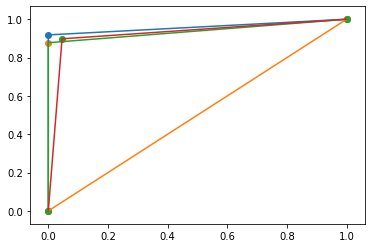

In [61]:
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)

#guess line
plt.plot([0,1],[0,1])

plt.scatter(fpr2,tpr2)
plt.plot(fpr2,tpr2)

plt.scatter(fpr3,tpr3)
plt.plot(fpr3,tpr3)

plt.show()



#sns.lmplot(fpr,tpr)

### Model 1 is most accurate, which means logistic regession with all the variables and default values of parameters